In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [4]:
data = pd.read_csv('./toss_reviews_20250209_20250810.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              2978 non-null   object
 1   content               2978 non-null   object
 2   score                 2978 non-null   int64 
 3   thumbsUpCount         2978 non-null   int64 
 4   reviewCreatedVersion  2610 non-null   object
 5   at                    2978 non-null   object
 6   replyContent          2495 non-null   object
 7   repliedAt             2495 non-null   object
 8   appVersion            2610 non-null   object
dtypes: int64(2), object(7)
memory usage: 209.5+ KB


In [6]:
data.head()

userName                                            content  score  \
0      최에스더                             카드도 주고 어디서든 쓸수있어서 좋아요!      5   
1       탁도윤                          업데이트를 왜 했는지 궁금하네요. 더 불편해요      1   
2      하하TV                                          앱이 안 들어가짐      1   
3        머왤                                    이달의미션으로 거짓말침 ㅠㅠ      1   
4  오륑Oryung  토스만보기에 있는 포인트는 윌래 400?넘기면 사라지나요? 출금안했는데 월래 사라지...      4   

   thumbsUpCount reviewCreatedVersion                   at  \
0              0              5.223.0  2025-08-09 13:57:14   
1              0              5.223.0  2025-08-09 12:54:17   
2              0              5.223.0  2025-08-09 10:44:31   
3              0              5.223.0  2025-08-09 10:20:35   
4              0              5.223.0  2025-08-09 04:36:20   

                                        replyContent            repliedAt  \
0                                                NaN                  NaN   
1  안녕하세요, 탁도윤님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으나...  2025-08-10 04:37:15   
2  안녕하세요. 하하TV 님, 토스팀입니다. 남겨주신 내용만으로는 정확한 확인이 어려운...  2025-08-10 04:36:25   
3  안녕하세요. 머왤 님, 토스팀입니다. 남겨주신 내용만으로는 정확한 확인이 어려운 점...  2025-08-10 04:36:10   
4  안녕하세요. 조오륑Oryung 님, 토스팀입니다. 토스포인트는 내역에 혹시 사용이력...  2025-08-09 07:03:59   

  appVersion  
0    5.223.0  
1    5.223.0  
2    5.223.0  
3    5.223.0  
4    5.223.0

# 워드클라우드(2/9-8/9)

In [7]:
data['score'].value_counts()

score
1    1421
5     676
3     350
2     287
4     244
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

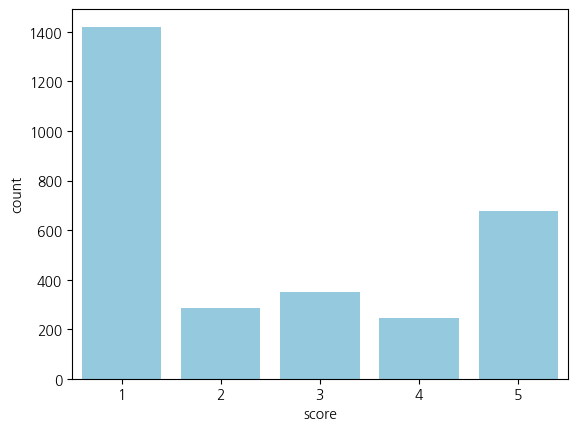

In [8]:
sns.barplot(data['score'].value_counts(), color='skyblue')

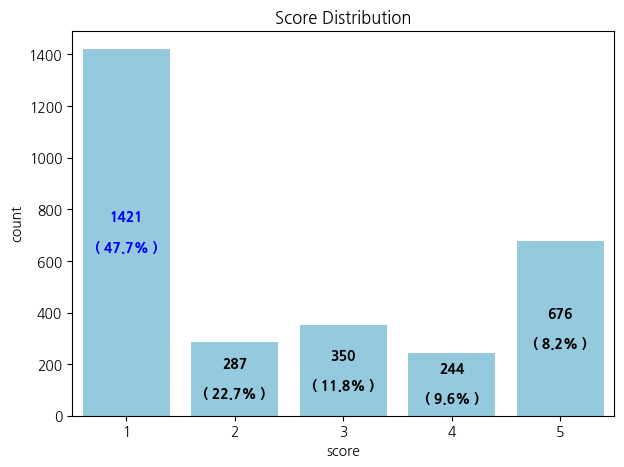

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 점수별 개수와 비율 계산
score_counts = data['score'].value_counts().reset_index()
score_counts.columns = ['score', 'count']
score_counts['pct'] = score_counts['count'] / score_counts['count'].sum() * 100

plt.figure(figsize=(7,5))
ax = sns.barplot(x='score', y='count', data=score_counts, color='skyblue')

# 가장 높은 count의 인덱스
max_idx = score_counts['count'].idxmax()

# 막대별로 라벨 개별 추가
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        label = f"{bar.get_height():.0f}\n\n( {score_counts['pct'].iloc[j]:.1f}% )"
        color = 'blue' if j == max_idx else 'black'
        ax.text(
            bar.get_x() + bar.get_width()/2,      # X 위치 중앙
            bar.get_height()/2,                  # Y 위치 중앙
            label,
            ha='center', va='center',
            color=color, fontsize=10, fontweight='bold'
        )

plt.title("Score Distribution")
plt.show()

In [10]:
import re
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = ' '.join(matches)
    return matches

In [11]:
data['content'] = data['content'].apply(text_clean)

In [12]:
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab = Mecab()

In [13]:
from collections import Counter
import pandas as pd

for i in range(1, 6):
    text_data = data.loc[data['score'] == i, 'content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    # 불용어 세트
    stopwords = set(['토스', '사용', '불편'])

    # 명사 추출 및 필터링
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    # 단어 빈도수 집계
    word_freq = Counter(filtered)
    total_count = sum(word_freq.values())

    # 상위 20개 단어 출력 (원하는 개수로 조정 가능)
    top_words = word_freq.most_common(20)
    df_top_words = pd.DataFrame(top_words, columns=['단어', '빈도수'])
    df_top_words['비율(%)'] = (df_top_words['빈도수'] / total_count * 100).round(2)

    print(f"\n=== 평점 {i}점 리뷰 상위 단어 ===")
    display(df_top_words)


=== 평점 1점 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     광고  487   4.06
1     계좌  456   3.80
2   업데이트  321   2.68
3     화면  250   2.08
4     증권  143   1.19
5     기능   96   0.80
6     확인   89   0.74
7     주식   88   0.73
8     건지   87   0.73
9     사람   87   0.73
10   이벤트   86   0.72
11    인증   85   0.71
12    설정   83   0.69
13    오류   83   0.69
14    미션   76   0.63
15    카드   74   0.62
16    이상   71   0.59
17   포인트   67   0.56
18    결제   65   0.54
19    이번   65   0.54


=== 평점 2점 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     계좌   91   3.96
1   업데이트   71   3.09
2     광고   64   2.79
3     화면   64   2.79
4     증권   30   1.31
5     기능   25   1.09
6     충전   24   1.04
7     카드   23   1.00
8    이벤트   23   1.00
9     결제   22   0.96
10    확인   18   0.78
11    이번   17   0.74
12    복권   16   0.70
13    번호   16   0.70
14   고양이   15   0.65
15    연결   14   0.61
16    사람   14   0.61
17    주식   13   0.57
18   포인트   13   0.57
19    버튼   13   0.57


=== 평점 3점 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     계좌  110   3.95
1   업데이트   96   3.45
2     화면   71   2.55
3     광고   42   1.51
4     증권   39   1.40
5     확인   33   1.19
6     카드   29   1.04
7     기능   29   1.04
8     설정   26   0.93
9     결제   25   0.90
10    미션   24   0.86
11    버그   23   0.83
12   고양이   20   0.72
13   장난감   20   0.72
14    필요   19   0.68
15    이유   19   0.68
16    생각   18   0.65
17   포인트   18   0.65
18    내역   18   0.65
19    주식   18   0.65


=== 평점 4점 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     계좌   53   3.01
1   업데이트   45   2.56
2     화면   37   2.10
3    포인트   26   1.48
4     확인   21   1.19
5     기능   20   1.14
6     증권   19   1.08
7     카드   18   1.02
8     광고   18   1.02
9     미션   17   0.97
10    인증   16   0.91
11    추가   15   0.85
12    주식   14   0.80
13    개선   14   0.80
14    은행   14   0.80
15    오류   13   0.74
16    편리   12   0.68
17    버튼   12   0.68
18    설정   12   0.68
19    가능   11   0.63


=== 평점 5점 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     계좌  103   3.33
1     편리   70   2.26
2     화면   58   1.87
3   업데이트   53   1.71
4     기능   49   1.58
5     증권   47   1.52
6     주식   45   1.45
7     감사   38   1.23
8     최고   32   1.03
9     확인   27   0.87
10    이용   26   0.84
11    카드   25   0.81
12    은행   25   0.81
13    추가   23   0.74
14    사람   22   0.71
15    정보   20   0.65
16    설정   18   0.58
17    자산   17   0.55
18    내역   16   0.52
19    가지   16   0.52

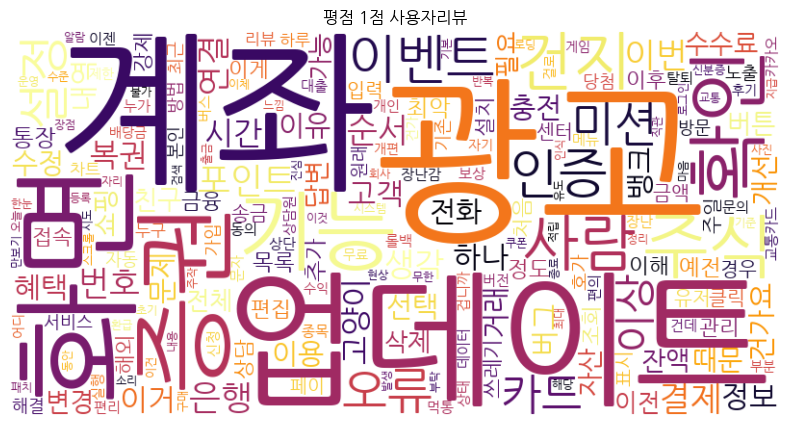

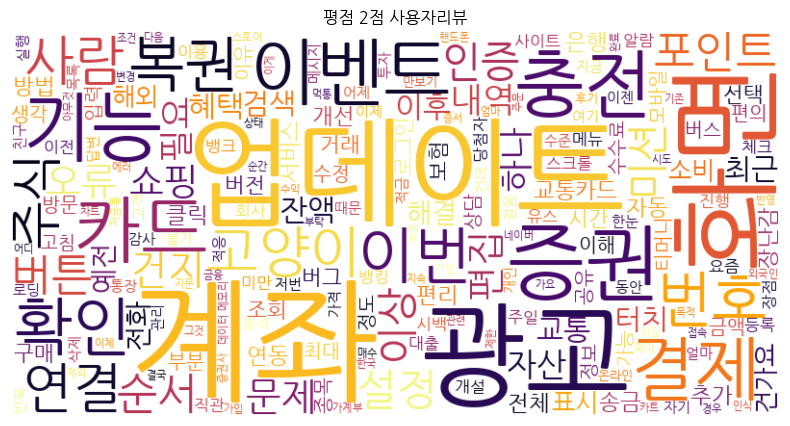

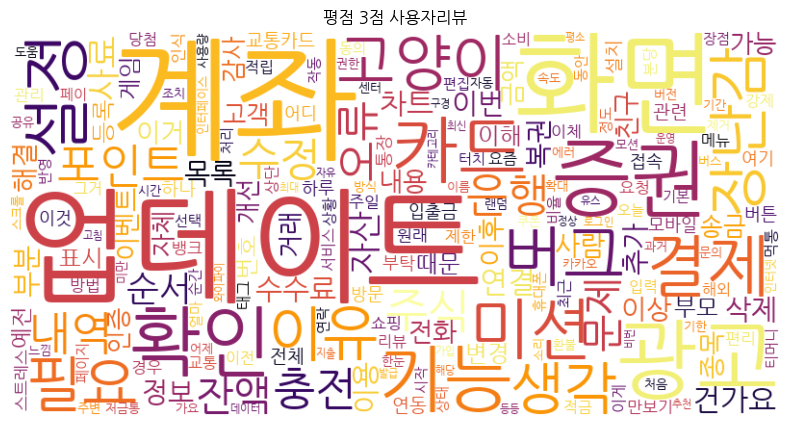

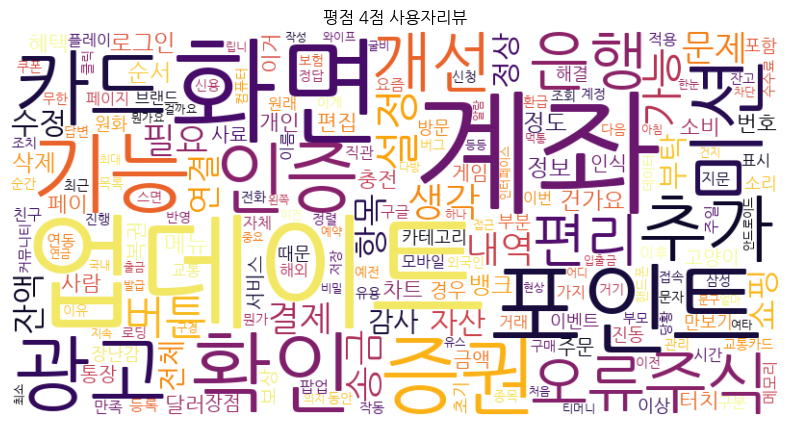

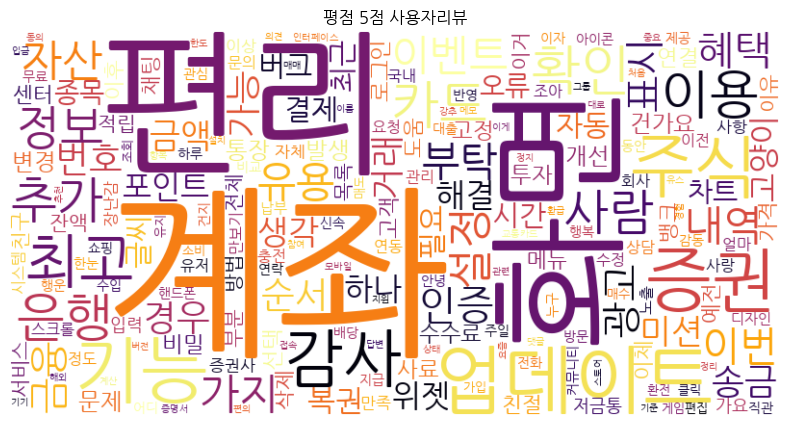

In [14]:
for i in range(1,6):
    
    text_data = data.loc[data['score']==i,'content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    # 불용어 세트 생성
    stopwords = set(['토스', '사용', '불편', '상품', '짜증'])

    # 명사 추출
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    # 빈도수 집계
    from collections import Counter
    word_freq = Counter(filtered)

    # 워드클라우드 생성
    wc = WordCloud(
            font_path='NanumGothic.ttf',
            background_color='white',
            colormap='inferno',
            width=800,
            height=400).generate_from_frequencies(word_freq)

    # 시각화
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"평점 {i}점 사용자리뷰")
    plt.show()

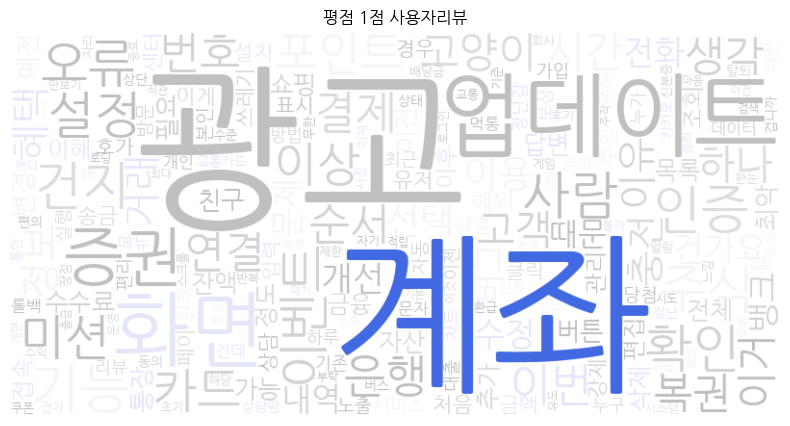

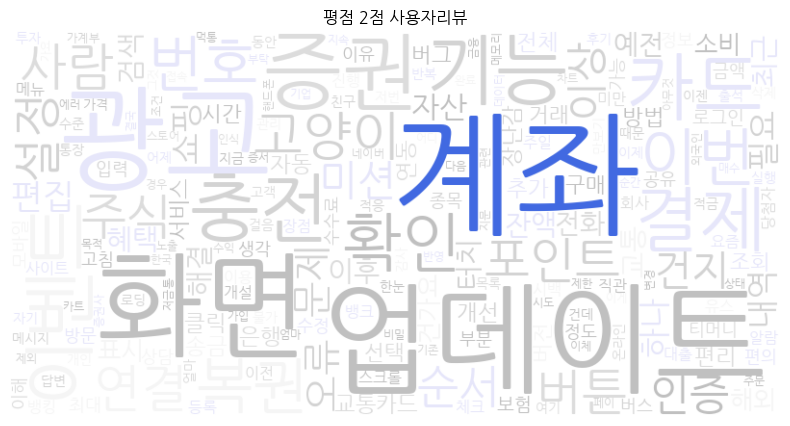

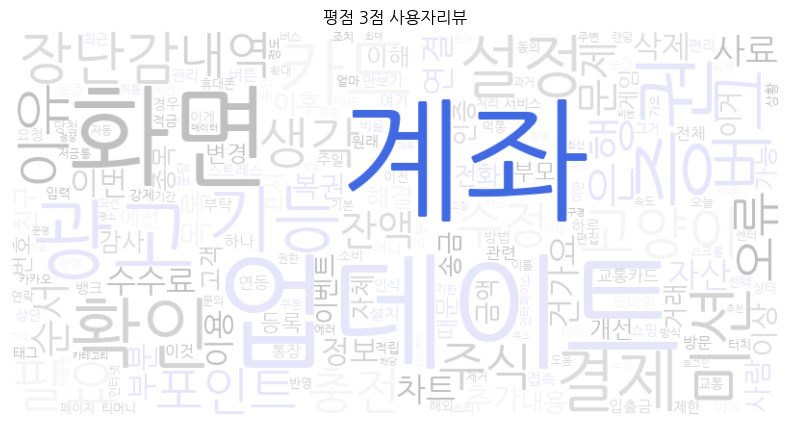

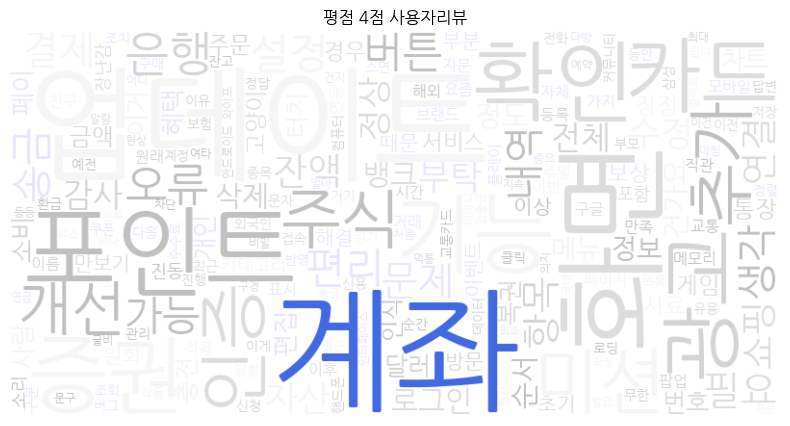

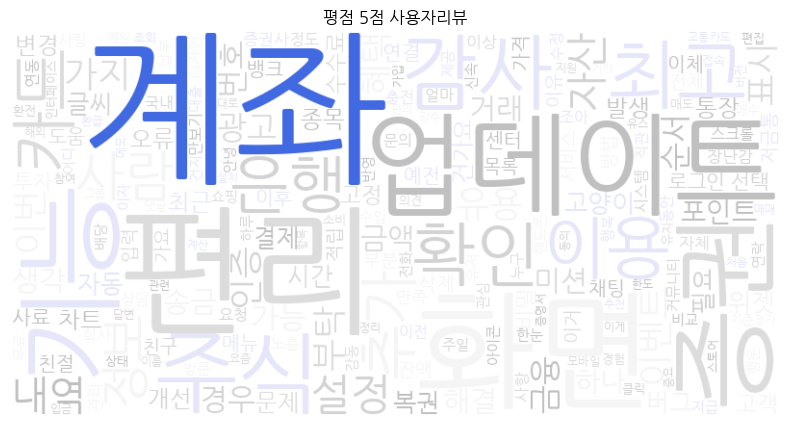

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

# 은은한 색상 팔레트 (눈에 덜 띄는 계열)
neutral_colors = ["lightgray", "gainsboro", "silver", "whitesmoke", "lavender"]

# 단어 색상 함수 정의
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["계좌", "홈\s?화면"]:
        return "royalblue"   # ✅ 더 세련된 파란색
    else:
        return random.choice(neutral_colors)  # ✅ 나머지는 은은한 색 중 하나 랜덤 선택

for i in range(1, 6):
    text_data = data.loc[data['score'] == i, 'content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    stopwords = set(['토스', '사용', '불편', '상품', '짜증'])
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    word_freq = Counter(filtered)

    wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400,
        color_func=custom_color_func
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"평점 {i}점 사용자리뷰")
    plt.show()

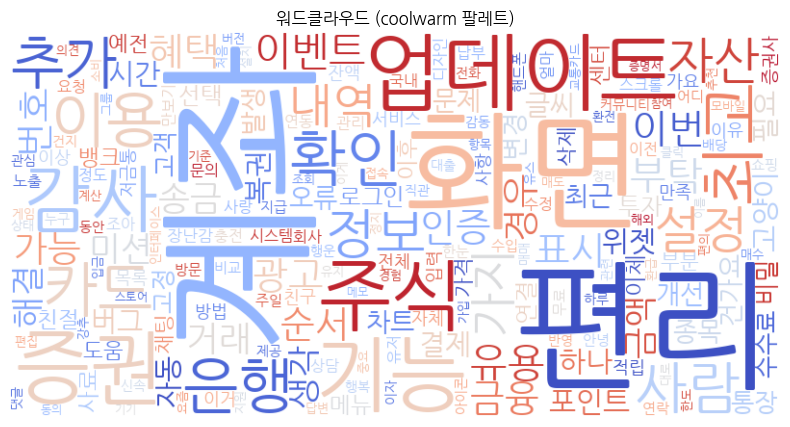

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='NanumGothic.ttf',
    background_color='white',
    colormap='coolwarm',   # 🔹 색상 팔레트 지정 (예: 'coolwarm', 'viridis', 'plasma', 'inferno' 등)
    width=800,
    height=400
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("워드클라우드 (coolwarm 팔레트)")
plt.show()

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 공감

In [18]:
# 공감 상위 5% 뽑기
percent = 5
n_top = int(len(data) * (percent / 100))

top_p = (
    data
    .sort_values('thumbsUpCount', ascending=False)
    .loc[:, ['score', 'content', 'thumbsUpCount', 'at']]
    .head(n_top)
)

In [19]:
top_p

score  \
1331      1   
1274      4   
1651      1   
1237      5   
2019      1   
1401      1   
1816      5   
621       1   
693       1   
2442      5   
1670      1   
2179      1   
1172      5   
2879      5   
2771      1   
497       5   
640       2   
1341      5   
1632      5   
2069      5   
480       3   
2420      5   
2023      1   
1897      5   
2665      5   
473       1   
1464      1   
777       1   
2904      1   
31        5   
1568      5   
2115      1   
2860      1   
1166      3   
1579      1   
2484      1   
49        1   
2148      4   
2101      2   
2057      5   
1565      4   
1307      1   
1532      1   
2199      1   
2713      5   
2843      1   
2213      5   
804       1   
2349      1   
2736      3   
2773      3   
2487      3   
2677      1   
2569      1   
485       1   
1538      1   
681       1   
840       1   
2720      2   
327       1   
2555      3   
221       5   
2482      5   
2592      1   
2650      1   
937       3   
1929      1   
2881      1   
1415      1   
1555      5   
2314      4   
1181      1   
2009      3   
1319      2   
1724      2   
808       1   
2051      1   
2938      5   
1726      1   
880       5   
2725      2   
2722      1   
1553      3   
1824      1   
2764      2   
2928      5   
1430      2   
2877      1   
1386      3   
564       1   
1661      2   
2146      1   
2707      1   
2191      1   
817       2   
723       2   
1987      1   
504       2   
1947      1   
2943      1   
596       5   
464       3   
272       1   
1245      3   
1549      1   
1381      1   
2671      2   
1956      2   
2226      2   
1631      2   
2604      1   
1312      4   
50        1   
2317      2   
2105      3   
2453      2   
2690      2   
1968      3   
328       1   
388       1   
1455      1   
2882      4   
1759      1   
202       1   
694       1   
2186      1   
1240      1   
1483      5   
2889      3   
943       1   
1541      2   
2784      1   
2596      3   
2627      1   
2633      1   
2028      3   
776       1   
2432      1   
1278      1   
1404      3   
2136      4   
2429      1   
1850      1   
377       1   
2428      1   
429       5   
702       1   
849       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              content  \
1331                                                                                                                                                                                                                                                        너무 구림 특히 아직도 별로라 생각하는 돈보다 계좌나 사람 먼저 선택하는거 적응안되는데 이번 자주쓰는 계좌 개편은 특히 망했음 난 주식을 위한 조회용이 있고 송금을 위한 메인 계좌가 있는데 메인 계좌는 그 수많은 입출금내역이 있음에도 어떤 알고리즘인지 구석에 짱박혀있음 폰트도 구리고 색상도 배치도 내멋대로라 나이든 사람들은 사용하지도 못할듯 메인 화면 같은 중요 UI는 피쳐플래그 값 등으로 이전버전도 선택적으로 쓸 수 있도록 선택권을 좀 줘라   
1274                    토스 앱 자체는 수수료도 없고 편히 쓰기 너무 좋습니다 문제가 좀 있는거 같아요 토스 포인트 혜택이 확실히 사탕 한 개 1달에 1개 구입 할까로 너무 자잘 하게 줍니다 만보기 보상이 매우 짭니다 약 5 10포인트 가까이 주던데 인간적 으로 누구 코에 붙혀요 그리고 게임 포인트 보상 중 에서 너무 단 기간 으로 플레이 하는 미션이 있던데 무슨 게임 35렙 이상 달성 하면 6천원 만원 시간 으로 봤을때 단순히 몇십분 안에 달성 하는거면 모를까 대부분 생소한 게임 이라 하는데 수십시간은 걸리는데 보상이 너무 짜요 그리고 상담을 신청 하는 미션이 있는데 천원은 뭡니까 유료로 3만원 이상 해야 몇천원 만원 정도 주는데 저희는 이득 볼게 없는 미션 으로 포인트를 현금 하는데 너무 많이 수수료 때는거 같아요 100포인트 90원 1만포인트 9천원 이렇게 커지면 손해가 많아요 실생활 에서 쓸 정도로는 해야 토스 이용자가 늘죠 진짜 전체적인 개선 부탁 드립니다   
1651                                                                                                                                                                                                                                                           

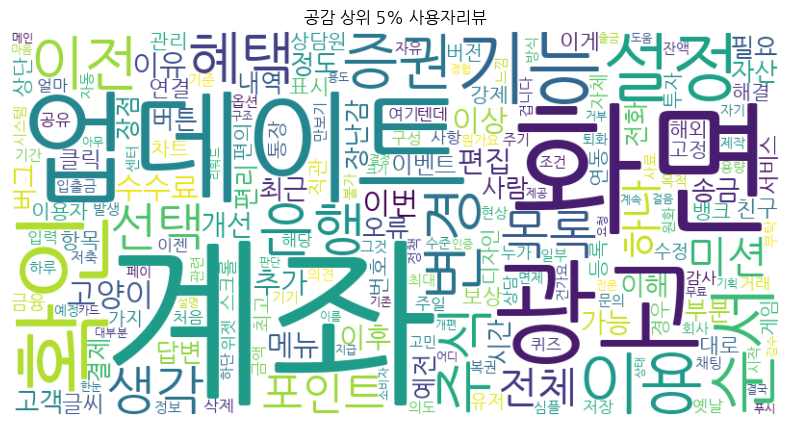

In [20]:
text_data = top_p['content'].astype(str).tolist()
full_text = ' '.join(text_data)

# 불용어 세트 생성
stopwords = set(['토스', '사용', '불편', '짜증', '주문', '때문', '문제', '건지'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계
from collections import Counter
word_freq = Counter(filtered)

# 워드클라우드 생성
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"공감 상위 5% 사용자리뷰")
plt.show()

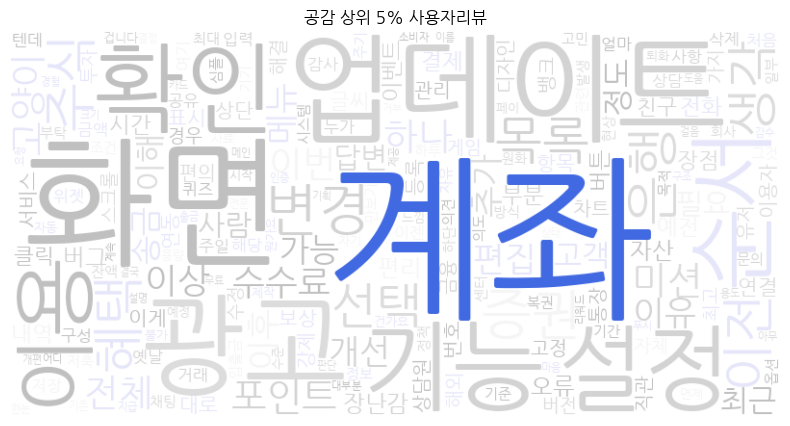

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

text_data = top_p['content'].astype(str).tolist()
full_text = ' '.join(text_data)

# 불용어 세트
stopwords = set(['토스', '사용', '불편', '짜증', '주문', '때문', '문제', '건지'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계
word_freq = Counter(filtered)

# ===== 색상 커스터마이즈 =====
# 강조할 단어(파란계열) — 필요하면 {"계좌","홈"}처럼 확장 가능
highlight_words = {"계좌", "홈\s?화면"}

# 고급 파란계열 중 택1 (원하면 'navy','steelblue','dodgerblue'로 변경 가능)
highlight_color = "royalblue"

# 눈에 덜 띄는 중립 톤 팔레트
neutral_colors = ["lightgray", "gainsboro", "silver", "whitesmoke", "lavender"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlight_words:
        return highlight_color
    return random.choice(neutral_colors)

# 워드클라우드 생성
wc = WordCloud(
    font_path='NanumGothic.ttf',
    background_color='white',
    width=800,
    height=400,
    color_func=custom_color_func  # ✅ 단어별 색상 지정
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("공감 상위 5% 사용자리뷰")
plt.show()

In [22]:
total_count = sum(word_freq.values())

# 상위 20개 단어 출력 (원하는 개수로 조정 가능)
top_words = word_freq.most_common(20)
df_top_words = pd.DataFrame(top_words, columns=['단어', '빈도수'])
df_top_words['비율(%)'] = (df_top_words['빈도수'] / total_count * 100).round(2)

print(f"\n=== top50 리뷰 상위 단어 ===")
display(df_top_words)


=== top50 리뷰 상위 단어 ===


단어  빈도수  비율(%)
0     계좌  140   5.34
1     화면   81   3.09
2   업데이트   56   2.14
3     광고   49   1.87
4     확인   38   1.45
5     기능   38   1.45
6     설정   34   1.30
7     순서   29   1.11
8     이용   27   1.03
9     변경   23   0.88
10    증권   21   0.80
11    주식   20   0.76
12    이전   20   0.76
13    혜택   20   0.76
14    은행   20   0.76
15    생각   19   0.72
16    목록   19   0.72
17    선택   18   0.69
18   포인트   18   0.69
19    미션   18   0.69

## 계좌

In [23]:
data.loc[
    data['content'].str.contains('홈화면') & data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는'),
    ['content','score','thumbsUpCount','appVersion','at']
]

content  \
32                                                                                                                                                                                                                                                                                                                                                          자주쓰는 계좌 생기고 홈화면에 계좌 3개만 노출되는데 잘 보지도 않는 토스뱅크 모임통장이 껴있길래 다른 계좌로 바꾸려는데 리스트 핸들러부분 이벤트 먹통이라 리스트 변경이 안됨 빨리 고쳐줘요 고객센터에서 해당내용으로 상담원 연결도 없어서 여기에 남김   
56                                                                                                                                                                                                                                                                                                                                                                                                                                   왜 홈화면에 계좌 3개밖에안됩니까 기술적으로 불가능한거 아니잖아요 윗선에 꼰대가있나 많은사람들이 뭐라해도 눈감고귀닫네   
60                                                                                                                                                                                                                                                                                                                                아 후기를 보고 업데이트를 했어야했는데 거래 내역에 카테고리별로 아이콘 나오는거 이전처럼 다시 돌아올 가능성이 있나요 소비 내역 탭엔 아직 있긴한데 보기가 불편하네요 그리고 자주 쓰는 계좌 3개만 홈화면에 노출되는 건 이유가 있나요 이전처럼 숨길거 선택하고 나머지는 다 노출되게 했으면 좋겠어요   
74                                                                                                                                                                                                                                                                                                                                                                                                                                                              잘쓰고있었는데 홈화면 너무 불편해진것같아요 전아 훨씬좋아요 감사합니다   
112                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       홈화면 바뀐거 불편해여   
115                                                                                                                                                                                                                                                                                                                                                                                     업데이트 되기 전까지 좋았는데 업데이트 되고나서 계좌가 숨겨져서 찾느라 한참 걸렸어요 불편해요 화면이 복잡해진 느낌이라서 보기도 별로고 쓰는 기능이 그리 많지않은데 홈화면은 딱 업데이트 전이 나아요   
171                                                                                                                                                                                                                                                                                                                                다른건 다 좋은데 업데이트 하고 홈화면의 시인성이 너무 떨어졌습니다 원래 상단에 큼지막하게 위치해있던 내 계좌 금액이 업데이트 이후 너무 작아져 한번에 알아보기 조금 별로입니다 자주쓰는 계좌 기능은 좋지만 폰트 크기를 키우는 등해서 확실히 구분하고 알아볼수 있게 ui만 다시 수정했으면 하네요   
179                                                                                                                                                                                                                                                                                                                                                                                                                                                                                이번에 바뀐 홈화면 너무보기불편해요   
189                                                                  

In [24]:
account = data.loc[
    data['content'].str.contains('계좌|통장') & data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [25]:
account.to_csv('./account리뷰.csv',encoding='utf-8')

In [26]:
account.sort_values('thumbsUpCount', ascending=False)

content  \
1331                                                                                                                                                                                                                                           너무 구림 특히 아직도 별로라 생각하는 돈보다 계좌나 사람 먼저 선택하는거 적응안되는데 이번 자주쓰는 계좌 개편은 특히 망했음 난 주식을 위한 조회용이 있고 송금을 위한 메인 계좌가 있는데 메인 계좌는 그 수많은 입출금내역이 있음에도 어떤 알고리즘인지 구석에 짱박혀있음 폰트도 구리고 색상도 배치도 내멋대로라 나이든 사람들은 사용하지도 못할듯 메인 화면 같은 중요 UI는 피쳐플래그 값 등으로 이전버전도 선택적으로 쓸 수 있도록 선택권을 좀 줘라   
1651                                                                                                                                                                                                                                                                                                                                                                                 홈화면 개편되고 나서부터 계좌목록이 설정해둔 순서대로 있지않고 지 맘대로 순서가 바뀜 하 너무 짜증나고 거슬려요 계좌 이름보다는 순서를 손가락이 기억해서 선택하는데 자꾸 딴 계좌 선택될때마다 너무 불편합니다   
1237                                                                       몇년째 너무 잘 쓰고 있고 사용자들에게 어떤 정보와 편의를 제공하면 좋을지 고민한 흔적이 많이 느껴져서 개발자님들께 감사 인사를 드리고 싶습니다 다만 정말 홈 화면에 계좌 목록이 4개밖에 보이지 않고 그 4개마저 사용자가 원하는 대로 배치하거나 편하게 선택할 수 없다는 건 정말 이해가 되지 않습니다 심지어 그 4개의 목록은 어떤 기준으로 선택되는지도 모르게 몇 분 전까지 가장 많이 쓰고 가장 많이 조회하던 주 계좌가 숨겨지고 마음대로 거의 거래 내역이 없는 계좌가 표시되는 등 이용경험을 굉장히 떨어지게 하는 경우도 발생하고 있습니다 홈 화면에 내가 쓰는 계좌와 저축 내용을 내 우선순위대로 모아 관리할 수 있는것 은 토스의 정체성이자 이용자들이 토스를 찾게 한 가장 큰 이유라고 생각합니다 꼭 이전의 방식으로 복구해주셨으면 좋겠습니다   
2019                                                                                                                                                                                                        홈화면 계좌 목록 순서를 더이상 원하는 순서로 편집 못하게 업데이트 했던데 토스가 점점 퇴보하네요 금리도 낮고 쓰잘데기 없는 알림만 주구장창 보내고 해당 알림 카테고리 거부해놓으면 또다른 종류의 알림으로 귀찮게하고 알림끄기 갯수는 왜 10개로 제한 채팅상담 상담원 답변하는거 보면 돈아끼려고 아무나 고용한건지 전문성 하나 없고 저축은행 계좌 불러오기 하려는데 저축은행 안보여서 문의했더니 해당 은행에 문의하라네 나중에 알고보니 저축은행 탭이 오른쪽에 숨겨져있었음 탭에 대한 설명대신 그냥 아몰랑 딴데서 물어봐   
621                                                                                                                                                                                                                                                                                                                              다른 건 다 좋은데 자주 쓰는 계좌 판단해서 그것만 남겨놓고 다른 계좌는 다 숨기는 기능이 진짜 불편합니다 이체 내역도 있는 계좌들인데 화면에서 사라지니 전체계좌 버튼 클릭해야 되고 잠금 풀어서 확인해야되고 홈화면편집 탭에서 고정할 수 있게 해주든지 이전 화면 선택을 할 수 있게 해주시면 좋겠습니다   
2442                                                                                                                                                                                                                                                                    17년부터 사용해온 사람입니다 토스만큼 편하고 좋은 어플은 없는 것 같아요 특히 UI UX측면에서는 슈퍼앱들중 최고라고 생각합니다 다만 약간 아쉬운게 홈화면이 자주 확인한 계좌로 세팅이 바뀐게 몇달 되었는데 이게 좀 불편합니다 사용자가 원하는대로 세팅해서 볼 수 있게끔 하면 좋지 않을까 하여 의견 드립니다 내부적으로 무슨 의사결정을 통해서 이렇게 결정한지 모르겠지만 정말 아쉬운 결정이라고 생각합니다   
1670                                                                                                                                                                                                                                                                                                                                                                                                 홈화면 너무 불편한데 개선이 되고 있나요 애초에 이 앱을 쓰는 이유가 계좌 편하게 관리하려고 만든거 아닌가요 왜 더 불편하게 만든건지 개선이 없다면 이제 다른 앱으로 갈아타려구요   
2179                                                                                                                                                                     첫화면 계좌 설정을 왜 시스템이 설정하게 하나요 제가 원하는 대로 설정 다 해놨는데 멋대로 고정시켜놔서 확인만 더 불편해졌습니다 정말 이용자가 사용하기 쉽게 업데이트 한게 맞나요 이렇게 아무런 통지도 없이 갑작스럽게 시스템 변경하고 잔액 확인하는게 너무 불편해져서 화나네요 자율성이 떨어져서 이용성이 매우 떨어집니다 사용하기 쉬운걸로 유명한 토스니까 이 문제도 곧바로 해결해 주실거라 믿습니다 다시 사용자가 원하는대로 홈화면 설정할 수 있도록 변경해주세요 계속 이 상태가 계속되면 어쩔 수 없이 토스 계좌를 없애는 것이 방법이 될 수밖에 없네요 토스의 장점이 없어졌습니다   
2879                                                 

In [27]:
account.sort_values('at', ascending=False)

content  \
32                                                                                                                                                                                                                                                                                                                                                            자주쓰는 계좌 생기고 홈화면에 계좌 3개만 노출되는데 잘 보지도 않는 토스뱅크 모임통장이 껴있길래 다른 계좌로 바꾸려는데 리스트 핸들러부분 이벤트 먹통이라 리스트 변경이 안됨 빨리 고쳐줘요 고객센터에서 해당내용으로 상담원 연결도 없어서 여기에 남김   
36                                                                                                                                                                                                                                                                                                                                                                                   자주 쓰는 계좌 때문에 계좌 3개씩 보이는거 너무 별로 한눈에 다 보려고 토스 쓰는데 3개씩 보고 나머지 보려면 인증해야 되고 진짜 불편함 편히 보지도 못하는데 사용하는 계좌 다 연결하는 의미가 있을까 싶음   
39                                                                                                                                                                                                                                                                                                                                                                                                                                         업데이트 할때마다 계좌 순서가 바껴서 헷갈리고 불편해요 순서 고정되거나 이용자가 직접 편집할 수 있음 좋겠어요   
53                                                                                                                                                                                                                           이번에 업데이트 되고 왜 멀쩡이 쓰던 계좌들이 다 숨겨진거죠 심지어 계좌 노출도 3개밖에 안되고 광고 덕지덕지에 앱도 엄청 무거워지고 느려지고 불편합니다 첫화면이 너무 지저분하고 필요없는 배너는 삭제도 안 고 옛날에는 토스가 참 깔끔했는데 이제는 카카오페이가 훨씬 직관적이고 깔끔하네요 댓글 답변들 보니 본인들 철학 고집하는것 같은데 처음의 진짜 직관적이거 편리했던 토스가 그립습니다 진짜 옮기는거 너무너무 귀찮아서 안할러고했는데 갈수록 앱이 지저분해져서 다른 앱으로 이사갑니다   
56                                                                                                                                                                                                                                                                                                                                                                                                                                     왜 홈화면에 계좌 3개밖에안됩니까 기술적으로 불가능한거 아니잖아요 윗선에 꼰대가있나 많은사람들이 뭐라해도 눈감고귀닫네   
60                                                                                                                                                                                                                                                                                                                                  아 후기를 보고 업데이트를 했어야했는데 거래 내역에 카테고리별로 아이콘 나오는거 이전처럼 다시 돌아올 가능성이 있나요 소비 내역 탭엔 아직 있긴한데 보기가 불편하네요 그리고 자주 쓰는 계좌 3개만 홈화면에 노출되는 건 이유가 있나요 이전처럼 숨길거 선택하고 나머지는 다 노출되게 했으면 좋겠어요   
68                                                                                                           1 이번 업데이트를 통해 토스머니 잔액을 확인하고 싶으면 모든 계좌 보기를 클릭하고 비밀번호 인증을 해야지 볼 수 있다는 번거로운 점이 생겼어요 하지만 모든 계좌 보기가 한눈에 보여서 편리하기도 하죠 그래서 모든 계좌 보기의 시스템은 유지하되 잔액은 메인화면에서도 볼 수 있도록 바꾸면 편리할 것 같아요 2 토스 모의주식에서 회사를 검색할 수 있었으면 좋겠고 주요회사 말고 조금 더 광범위한 회사들도 있었으면 좋겠어요 그리고 토스모의주식을 하고있는 사용자들 중 가장 돈을 많이 벌고있는 순으로 랭킹시스템도 도입되면 재미있을 것 같아요 한줄요약 1 잔액을 메인화면에서 확인할 수 있으면 좋겠다 2 모의주식에서 회사 검색 기능 더 다양한 회사 추가 사용자 랭킹 시스템 등 도입 요망   
75                                                                                                                                                                                                                                                                                                                                                    1 주계좌 3개까지 밖에 고정 불가 광고 배너 자리때문에 추가 불가 2 잔액 새로고침 며칠 전 부터 잔액 새로고침이 굉장히 느려짐 오픈뱅킹포함 3 맨날 낚시성 게임 이벤트 등으로 열받게함 4 전혀 바뀔 생각 없는 토스 토스는 늦었으니 카뱅이 정신차려주면 안되겠니   
115                                                  

In [28]:
account.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 32 to 2926
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        280 non-null    object
 1   score          280 non-null    int64 
 2   thumbsUpCount  280 non-null    int64 
 3   appVersion     256 non-null    object
 4   at             280 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.1+ KB


In [29]:
data['thumbsUpCount'].sum()

11570

In [30]:
account['thumbsUpCount'].sum()

3998

<Axes: xlabel='score', ylabel='count'>

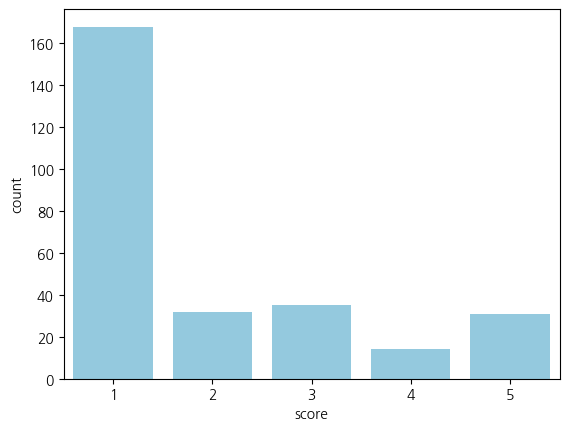

In [31]:
sns.barplot(account['score'].value_counts(), color='skyblue')

In [32]:
# 첫 번째 조건: 계좌 또는 통장
cond1 = data['content'].str.contains('계좌|통장', na=False)

# 두 번째 조건: 순서, 목록, 홈, 화면
cond2 = data['content'].str.contains('순서|목록|홈|화면|3개|리스트', na=False)

# cond1만 맞고 cond2는 안 맞는 경우
missing_after_second = data.loc[cond1 & ~cond2, ['content','score','thumbsUpCount','appVersion','at']]

missing_after_second

content  \
10                                                                                                                                                                                                                                                                                                                                                                                                                                                           계좌 최신화 시키려면 업데이트 하라면서 왜 업데이트가 안되냐고 실행시키면 바로 취소되네   
18                                                                                                                                                                                                                                                                                                                                                                                                                                                   신한카드 결제계좌가 신한은행으로 설정했는데 왜 토스뱅크로 조회가 되나요 다른카드는 제데로 조회되는데요   
20                                                                                                                                                                                                                                                                                                                                                                                                                                                           잘 들어가지던 적금통장에 갑자기 돈이 안들어가고 보낼 계좌가 맞냐고 계속 오류창이 떠요   
35                                                                                                                                                                                                                                                                                                                                                                                                                                                                 업데이트 되고 나서 계좌를 보기가 더 불편해졌습니다 다시 원래대로 바꿔주세요   
40                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  해외결제할려면 계좌열결해야되는게 좀 불편하네요   
57                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            어릴때부터 함께해온 첫 계좌   
83                                                                                                                                                                                                                         토스 머니 편의점에서 ATM기로 돈 꺼내고 넣는 기능 왜 이렇게 불편 합니까 넣는것 까지야 상관 없는데 나중에 계좌에서 돈 뺄때 왜 하루 최대 3만원 출금 제한 있는건지 모르겠고 하루 최대 3만원 출금까지라서 다음 날에 꺼내려고 편의점 가서 앱 키고 꺼내려고 하니까 하루 최대 3만원 까지만 꺼낼 수 있다는 문구가 왜 나옵니까 개선 좀 하세요 하루에 꺼낼 수 있는 출금 수량이 왜 3만원으로 제한이 되있는건지 모르겠습니다 입금은 최대 50만원까지라면서 왜 출금은 하루에 꼴랑 3만원까지인건지   
89                                                                                                                                                                                                                           정말 좋게 잘 이용하고 있는데 최근에 핸드폰이 박살나서 다른폰으로 로그인할려고 하는데 로그인이 되지 않습니다 계좌번호 인증은 자꾸 본인 명의 계좌가 아니라고 하고 1원인증도 저의 계좌가 아니라고 하고 그렇네요 3일째 로그인을 못하고 있어서 대중교통도 이용을 못하는 상황입니다 다른 타 은행어플은 로그인이 다 됐는데 자꾸 본인 명의 계좌가 아니라고하니 로그인이 전혀 되고 있지 않습니다 단순 오류인가요 또 카카오뱅크 계좌로 인증할려는데 예금주와 주민등록이 다르다고 하는데 이것도 오류인가요   
95           

In [33]:
missing_after_second.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 10 to 2960
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        238 non-null    object
 1   score          238 non-null    int64 
 2   thumbsUpCount  238 non-null    int64 
 3   appVersion     210 non-null    object
 4   at             238 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.2+ KB


전체 리뷰 수: 2978
account 리뷰 수: 280 (9.40%)


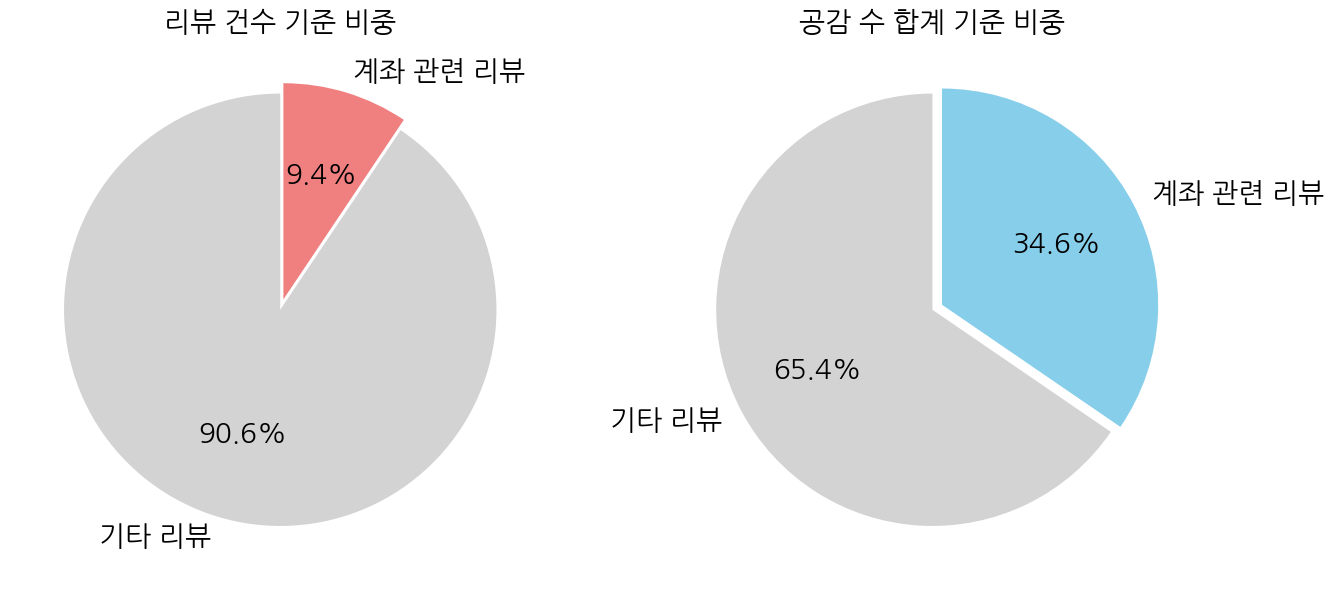

In [34]:
import matplotlib.pyplot as plt

# account 조건
account = data.loc[
    data['content'].str.contains('계좌|통장', na=False) &
    data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는', na=False),
    ['content','score','thumbsUpCount','appVersion','at']
]

# 개수 비교
total_count = len(data)
account_count = len(account)
percent = account_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"account 리뷰 수: {account_count} ({percent:.2f}%)")

# thumbsUpCount 합
account_thumbs_sum = account['thumbsUpCount'].sum()
other_thumbs_sum = data['thumbsUpCount'].sum() - account_thumbs_sum

labels = ['계좌 관련 리뷰', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 20}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=20)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 20}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=20)

plt.tight_layout()
plt.show()

전체 리뷰 수: 2978
account 리뷰 수: 280 (9.40%)


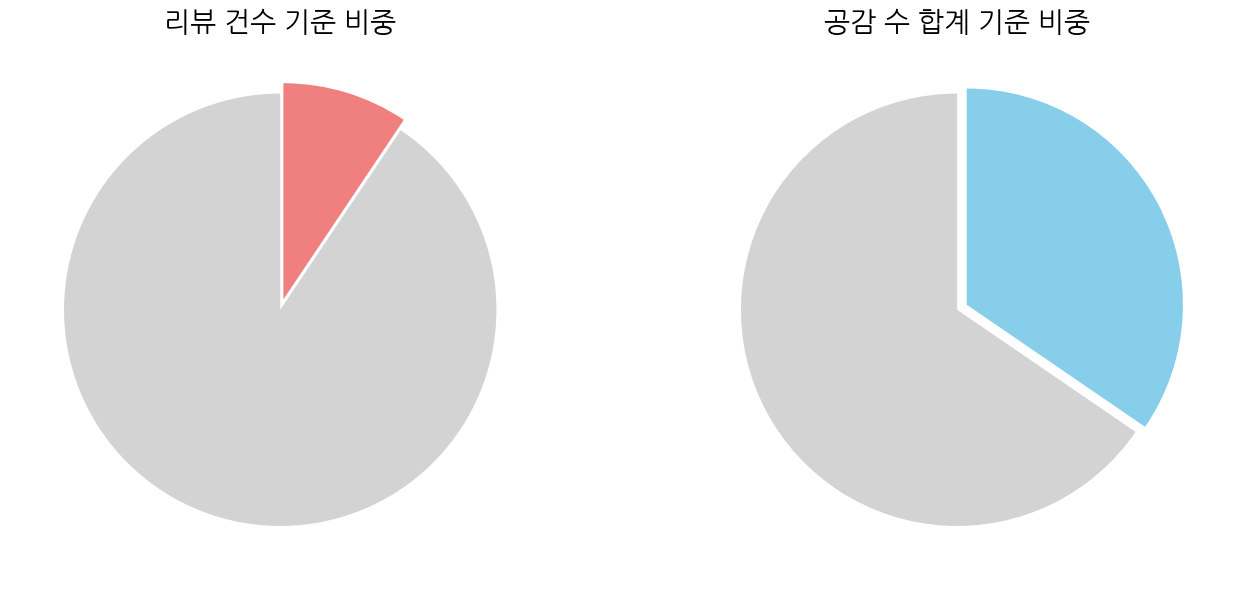

In [36]:
import matplotlib.pyplot as plt

# account 조건
account = data.loc[
    data['content'].str.contains('계좌|통장', na=False) &
    data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는', na=False),
    ['content','score','thumbsUpCount','appVersion','at']
]

# 개수 비교
total_count = len(data)
account_count = len(account)
percent = account_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"account 리뷰 수: {account_count} ({percent:.2f}%)")

# thumbsUpCount 합
account_thumbs_sum = account['thumbsUpCount'].sum()
other_thumbs_sum = data['thumbsUpCount'].sum() - account_thumbs_sum

labels = ['계좌 관련 리뷰', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    colors=['lightcoral', 'lightgray'],
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 20}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=20)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    colors=['skyblue', 'lightgray'],
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 20}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=20)

plt.tight_layout()
plt.show()

전체 리뷰 수: 2978
account 리뷰 수: 280 (9.40%)


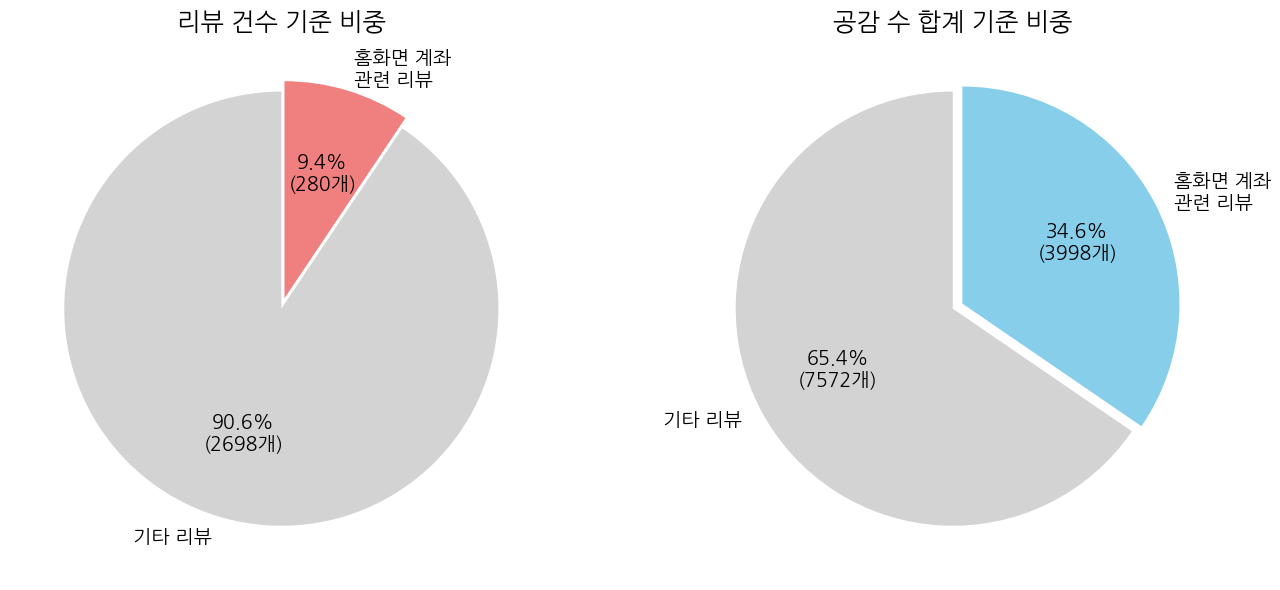

In [54]:
import matplotlib.pyplot as plt

# account 조건
account = data.loc[
    data['content'].str.contains('계좌|통장', na=False) &
    data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는', na=False),
    ['content','score','thumbsUpCount','appVersion','at']
]

# 개수 비교
total_count = len(data)
account_count = len(account)
percent = account_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"account 리뷰 수: {account_count} ({percent:.2f}%)")

# thumbsUpCount 합
account_thumbs_sum = account['thumbsUpCount'].sum()
other_thumbs_sum = data['thumbsUpCount'].sum() - account_thumbs_sum

labels = ['홈화면 계좌\n관련 리뷰', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === 커스텀 함수: 비율 + 건수 표시 ===
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({count}개)'
    return my_autopct

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct=make_autopct(sizes_count),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 14}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=18)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct=make_autopct(sizes_thumbs),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 14}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=18)

plt.tight_layout()
plt.show()

In [30]:
three = data.loc[
    data['content'].str.contains('계좌|통장') & data['content'].str.contains('3개'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [31]:
three.sort_values('appVersion')

content  \
835                                                                                                                                                                                                                                                                                                                                                                                                                            첫 화면에서 계좌연결 포인트적립 계좌개설 이거 3개 다 필요 없는데 강제로 해야되는 시스템인듯   
1518                                                                                                                                                                                                                                                                                                                                                                                                                  1 홈에서 뜨는 계좌순서 바꿀수있게 해주세요 2 갈아타면 좋을 신용카드추천시 카드1개말고 2 3개뜨게 해주세요   
585                                                                                                                                                                                                                                                                                                                                                                                   아니 왜 갑자기 홈화면에 계좌 3개만 보이나요 그리고 문제는 제가 잘 사용하지도 않는 계좌들이 홈화면에 있고 매일 사용하는 계좌는 전체보기를 해야 보여져요 이게 뭔가요   
647                                                                                                                                                                                                                                                                                                                                 도가 지나치신 거 아닙니까 얼마전 업데이트때 홈화면 계좌 개수 자주사용하는 계좌 위주로 5개로 제한 하더만 이제는 3개네요 토스뱅크 통장 말고는 2개 게다가 투자 배너도 아예 숨기네요 아무리 광고 유도 콘텐츠 유도하고 싶어도 그렇지 이건 너무한 거 아닙니까   
612                                                                                                                                                                                                                                                                                                                                                                                             예전처럼 메인화면에 자기가 원하는 계좌 한눈에 다 보일때가 좋았는데 지금 바뀐게 비슷하긴한데 또 3개가지만 보이네 자주쓰는 계좌가 5개면 어떡하라고요   
489                                                                                                                                                                                                                                                                                                                                                                                                                       자주쓰는계좌 3개만으로 해놔서 너무불편하다 첨에 편해서 썻는데 왜점점 불편하게 복잡하게 되어가고있는거지   
497                                                                                                                                                                                                                                                                                                                      항상 상상을 넘어선 기능과 독보적인 편리함 감사하게 늘 느끼고 사용중입니다 다만 홈 화면에 투자모아보기 같은 원하는 기능 3개는 추가 할수 있었으면 합니다 전에는 있었던거 같기도 하고 그래도 최고입니다 투자모아보기 는 계좌목록 최대3개 항목에 넣을수는 있네요 글쓴후뒤늦게 발견   
504                                                                                                                                                                                                                                                                                              토스 메인 계좌보는 화면이 바뀐거는 정말 누가 계획했는지 모르겠지만 별로 입니다 설정에 들어가서 메인에 볼 수 있게 계좌 설정하는 것도 3개 밖에 안되는 것도 별로 입니다 토스를 쓰는 이유가 전체 모아보는 기능이 편해서 였는데 업데이트 이후 그 기능이 잘 안되서 많이 불편합니다 이전 버전으로 다운그레이드 하고 싶습니다   
505                                                                                                                                                                                                                          

In [33]:
three = account[
    account['appVersion'] >= '5.20.0'
]

In [34]:
three

content  \
32                                                                                                                                                                                                                                                                                                                                                            자주쓰는 계좌 생기고 홈화면에 계좌 3개만 노출되는데 잘 보지도 않는 토스뱅크 모임통장이 껴있길래 다른 계좌로 바꾸려는데 리스트 핸들러부분 이벤트 먹통이라 리스트 변경이 안됨 빨리 고쳐줘요 고객센터에서 해당내용으로 상담원 연결도 없어서 여기에 남김   
36                                                                                                                                                                                                                                                                                                                                                                                   자주 쓰는 계좌 때문에 계좌 3개씩 보이는거 너무 별로 한눈에 다 보려고 토스 쓰는데 3개씩 보고 나머지 보려면 인증해야 되고 진짜 불편함 편히 보지도 못하는데 사용하는 계좌 다 연결하는 의미가 있을까 싶음   
39                                                                                                                                                                                                                                                                                                                                                                                                                                         업데이트 할때마다 계좌 순서가 바껴서 헷갈리고 불편해요 순서 고정되거나 이용자가 직접 편집할 수 있음 좋겠어요   
53                                                                                                                                                                                                                           이번에 업데이트 되고 왜 멀쩡이 쓰던 계좌들이 다 숨겨진거죠 심지어 계좌 노출도 3개밖에 안되고 광고 덕지덕지에 앱도 엄청 무거워지고 느려지고 불편합니다 첫화면이 너무 지저분하고 필요없는 배너는 삭제도 안 고 옛날에는 토스가 참 깔끔했는데 이제는 카카오페이가 훨씬 직관적이고 깔끔하네요 댓글 답변들 보니 본인들 철학 고집하는것 같은데 처음의 진짜 직관적이거 편리했던 토스가 그립습니다 진짜 옮기는거 너무너무 귀찮아서 안할러고했는데 갈수록 앱이 지저분해져서 다른 앱으로 이사갑니다   
56                                                                                                                                                                                                                                                                                                                                                                                                                                     왜 홈화면에 계좌 3개밖에안됩니까 기술적으로 불가능한거 아니잖아요 윗선에 꼰대가있나 많은사람들이 뭐라해도 눈감고귀닫네   
68                                                                                                           1 이번 업데이트를 통해 토스머니 잔액을 확인하고 싶으면 모든 계좌 보기를 클릭하고 비밀번호 인증을 해야지 볼 수 있다는 번거로운 점이 생겼어요 하지만 모든 계좌 보기가 한눈에 보여서 편리하기도 하죠 그래서 모든 계좌 보기의 시스템은 유지하되 잔액은 메인화면에서도 볼 수 있도록 바꾸면 편리할 것 같아요 2 토스 모의주식에서 회사를 검색할 수 있었으면 좋겠고 주요회사 말고 조금 더 광범위한 회사들도 있었으면 좋겠어요 그리고 토스모의주식을 하고있는 사용자들 중 가장 돈을 많이 벌고있는 순으로 랭킹시스템도 도입되면 재미있을 것 같아요 한줄요약 1 잔액을 메인화면에서 확인할 수 있으면 좋겠다 2 모의주식에서 회사 검색 기능 더 다양한 회사 추가 사용자 랭킹 시스템 등 도입 요망   
75                                                                                                                                                                                                                                                                                                                                                    1 주계좌 3개까지 밖에 고정 불가 광고 배너 자리때문에 추가 불가 2 잔액 새로고침 며칠 전 부터 잔액 새로고침이 굉장히 느려짐 오픈뱅킹포함 3 맨날 낚시성 게임 이벤트 등으로 열받게함 4 전혀 바뀔 생각 없는 토스 토스는 늦었으니 카뱅이 정신차려주면 안되겠니   
115                                                                                                                                                                                                                                                                                                                                                                                       업데이트 되기 전까지 좋았는데 업데이트 되고나서 계좌가 숨겨져서 찾느라 한참 걸렸어요 불편해요 화면이 복잡해진 느낌이라서 보기도 별로고 쓰는 기능이 그리 많지않은데 홈화면은 딱 업데이트 전이 나아요   
130                                                  

In [35]:
data_version = data[
    data['appVersion'] >= '5.20.0'
]

전체 리뷰 수: 2316
account 리뷰 수: 236 (10.19%)


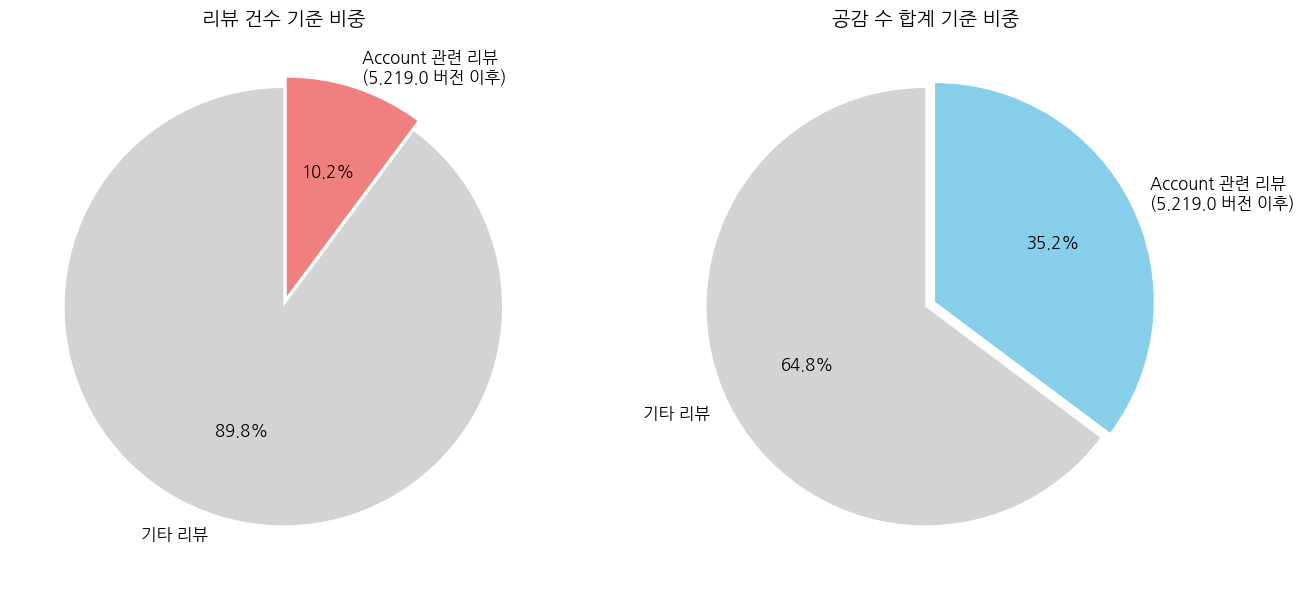

In [36]:
import matplotlib.pyplot as plt

# account 조건
account = data.loc[
    data['content'].str.contains('계좌|통장', na=False) &
    data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는', na=False),
    ['content','score','thumbsUpCount','appVersion','at']
]

# 개수 비교
total_count = len(data_version)
account_count = len(three)
percent = account_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"account 리뷰 수: {account_count} ({percent:.2f}%)")

# thumbsUpCount 합
account_thumbs_sum = three['thumbsUpCount'].sum()
other_thumbs_sum = data_version['thumbsUpCount'].sum() - account_thumbs_sum

labels = ['Account 관련 리뷰\n(5.219.0 버전 이후)', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=14)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=14)

plt.tight_layout()
plt.show()

전체 리뷰 수: 2316
account 리뷰 수: 236 (10.19%)


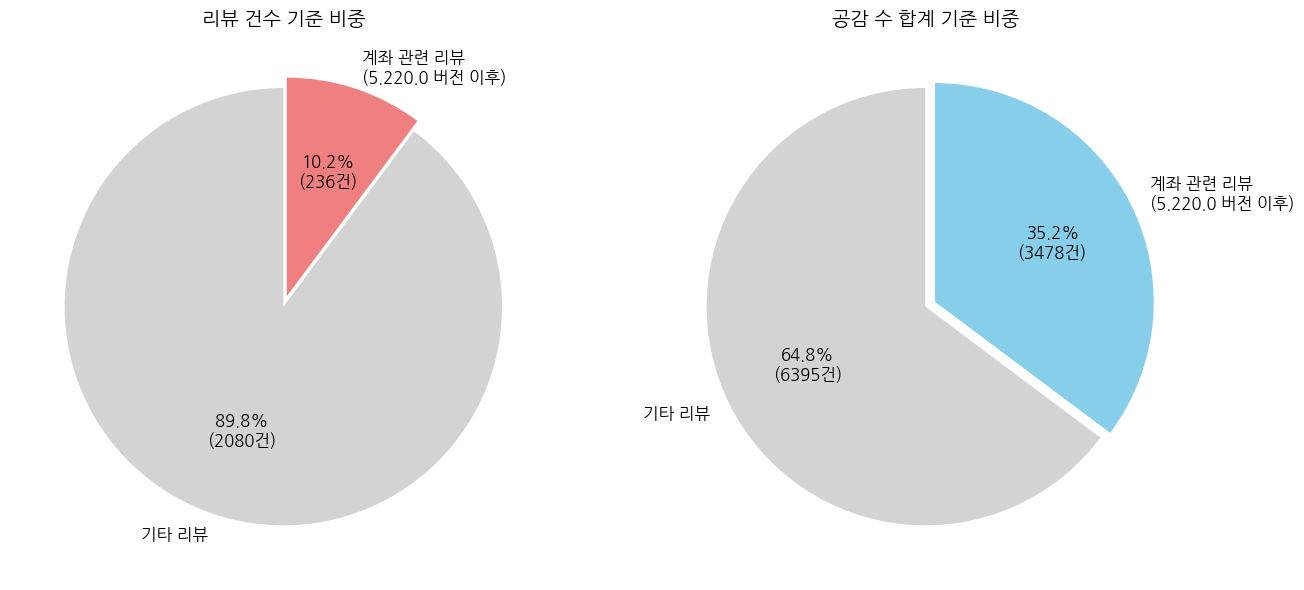

In [47]:
import matplotlib.pyplot as plt

# account 조건
account = data.loc[
    data['content'].str.contains('계좌|통장|순서|목록|홈|메인||리스트|자주쓰는|자주 쓰는', na=False) &
    data['content'].str.contains('3개', na=False),
    ['content','score','thumbsUpCount','appVersion','at']
]

# 개수 비교
total_count = len(data_version)
account_count = len(three)
percent = account_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"account 리뷰 수: {account_count} ({percent:.2f}%)")

# thumbsUpCount 합
account_thumbs_sum = three['thumbsUpCount'].sum()
other_thumbs_sum = data_version['thumbsUpCount'].sum() - account_thumbs_sum

labels = ['계좌 관련 리뷰\n(5.220.0 버전 이후)', '기타 리뷰']

# === Figure 생성 ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === 커스텀 함수: 비율 + 건수 표시 ===
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count}건)'
    return my_autopct

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct=make_autopct(sizes_count),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=14)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct=make_autopct(sizes_thumbs),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=14)

plt.tight_layout()
plt.show()

최근 30일 & 5.220.0 이상 전체 리뷰 수: 406
계좌 3개 관련 리뷰 수: 25 (6.16%)


/tmp/ipykernel_542/1916840269.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_window['content'].str.contains(kw_pattern, na=False, regex=True) &


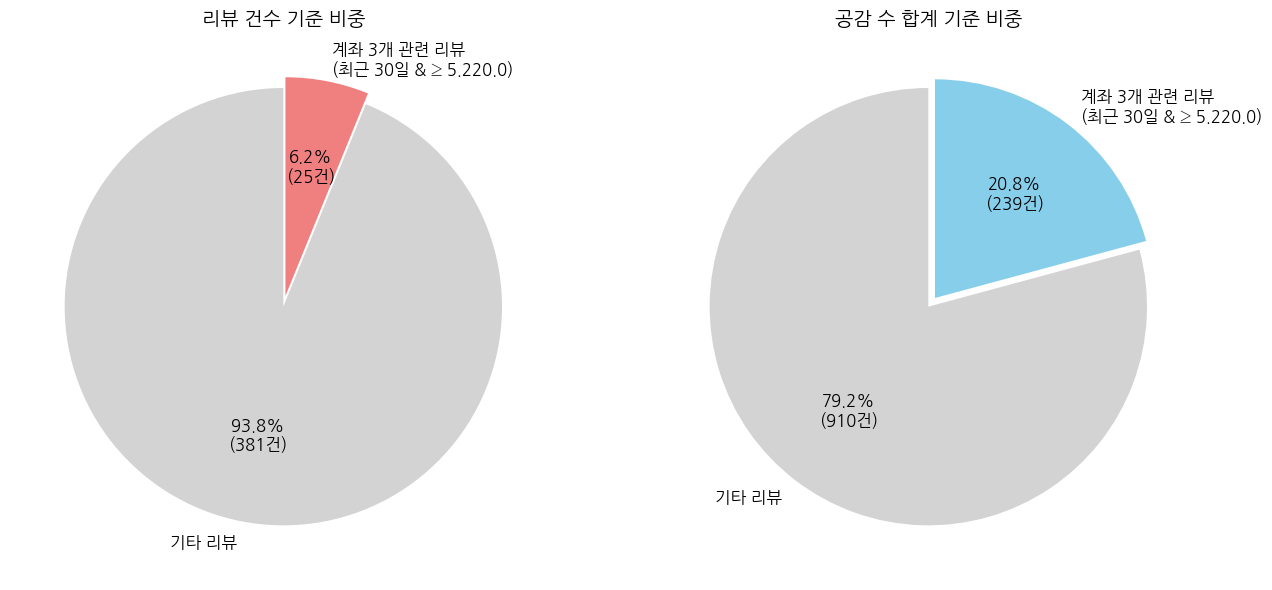

In [48]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- (1) 날짜/버전 필터 설정 ---
# 최근 30일
data = data.copy()
data['at'] = pd.to_datetime(data['at'], errors='coerce')
cutoff_date = pd.Timestamp.today().normalize() - pd.Timedelta(days=30)
mask_time = data['at'] >= cutoff_date

# 버전 기준 (예: 5.220.0 이후)  ← 필요 시 "2.20.0" 등으로 바꾸세요.
target_version = "5.220.0"

def version_to_tuple(v):
    nums = re.findall(r'\d+', str(v))
    nums = (nums + ['0','0','0'])[:3]  # 자리수 보정
    return tuple(map(int, nums))

target_tuple = version_to_tuple(target_version)
ver_tuple_series = data['appVersion'].apply(version_to_tuple)
mask_version = ver_tuple_series.apply(lambda t: t >= target_tuple)

# 최근 한달 & 대상 버전 이후 데이터
data_window = data.loc[mask_time & mask_version].copy()

# --- (2) "계좌 3개" 관련 키워드 필터 ---
# 주의: 기존 코드의 '메인||리스트'는 빈 패턴 때문에 과매칭될 수 있으니 1개 '|'만 유지
# '자주 쓰는'은 공백 유무 모두 잡도록 \s? 사용
kw_pattern = r'(계좌|통장|순서|목록|홈|메인|리스트|자주\s?쓰는)'
mask_kw = (
    data_window['content'].str.contains(kw_pattern, na=False, regex=True) &
    data_window['content'].str.contains(r'3\s*개', na=False, regex=True)
)

account = data_window.loc[
    mask_kw,
    ['content','score','thumbsUpCount','appVersion','at']
]

# --- (3) 집계값 계산 ---
total_count = len(data_window)
account_count = len(account)
percent = (account_count / total_count * 100) if total_count else 0.0

print(f"최근 30일 & {target_version} 이상 전체 리뷰 수: {total_count}")
print(f"계좌 3개 관련 리뷰 수: {account_count} ({percent:.2f}%)")

# 공감수 합계 파이
account_thumbs_sum = account['thumbsUpCount'].sum()
other_thumbs_sum = data_window['thumbsUpCount'].sum() - account_thumbs_sum

labels = [f'계좌 3개 관련 리뷰\n(최근 30일 & ≥ {target_version})', '기타 리뷰']

# --- (4) 시각화 ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

def make_autopct(values):
    def _fmt(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count}건)'
    return _fmt

# (좌) 리뷰 건수 기준
sizes_count = [account_count, total_count - account_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct=make_autopct(sizes_count),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=14)

# (우) 공감 수 합계 기준
sizes_thumbs = [account_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct=make_autopct(sizes_thumbs),
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=14)

plt.tight_layout()
plt.show()

## 광고

In [51]:
ad = data.loc[
    data['content'].str.contains('광고'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [52]:
ad.sort_values('thumbsUpCount', ascending=False)

content  \
693                                                                                                                                                                             요즘같이 더울때 만보를 걷기위해서는 일몰 이후에나 가능하다 그런데 만보기 복권이 하루 최대 7장을 모을 수 있는데 만보를 다 걷고 모았다가 한번에 긁으려고 하니 광고를 보면 복권이 나타나지않고 걸음수 그림화면이 나타나는 현상이 계속해서 무한루프로 발생하고있다 함께 토스켜고 포인트받기도 광고보다 끝난다 고양이 장난감 받기도 마찬가지 이럴거면 무료광고를 넣지말자 제발 느려지는것도 짜증나는데 나름 시간맞춰 챙기는 재미도 느끼다 광고로 버리는 시간에대한 대가도 제대로 지급받지 못하니까 진심으로 짜증난다 불쾌지수까지 높은 요즘 더이상 이용하기 싫어지게 만들진 말자   
2771                                                                                                                                                                                                                                                                                                                하 이번 홈 업데이트 이후로 사용성이 많이 불편해졌어요 총 자산을 한눈에 보기 편했는데 이번 변경으로 인해 접근이 어려워진 점이 아쉽고여 나눠 모으기도 자주 활용했는데 찾기가 더 어려워졌네요 광고 지면을 더 보여서 돈 벌어야하는 그런 구조 업데이트 방향이 이해는 되지만 사용자 입장에서 불편함이 커진 건 너무 불편합니다 그냥   
2023                                                                                                                                                                                                                                                                                                                                                             버그는 수시로 생기고 이미 수행한 미션 카운트 안 되는 오류도 잦아서 3번 이상 하게 만드네요 광고 보고 보상 주기 미션에서는 광고를 봤는데도 보상 받기 클릭하면서 다시 광고보기 활성화 되는 게 한 두번이 아닌거 보면 오류인 척 하는 의도같아요   
1464   2 25 주식 UI에서 홈과 관심 종목을 나눈 것도 불편한데 이번 자주 사용하는 계좌 업데이트로 완전히 사용 할 이유를 잃었음 원하는 순서와 기준에 맞춰 계좌들을 정리해뒀더니 강제로 일부 계좌만 뜨게 만들어 내 자산에 들어가는 과정을 한 번 더 거쳐야 한다는 불편함을 감수 할 이유가 전혀 없음 심지어 이전에는 잘만 계좌를 원하는 데로 순서를 정할 수 있었는데 자주 사용하는 계좌 중에서도 순서를 정할 수가 없는 게 어이가 없을 정도 편리한 UI로 이용자를 끌어 모았으면 UI가 불편해지는 순간 이용자는 떠난다는 사실을 망각한 회사 5 29 결국에는 주식 UI를 또 건드림 판매 수익을 확인하는 창에서 지맘대로 스크롤을 내리는 기능은 진짜 UX를 고려 한 흔적이 없음 이제 UI를 관리하는 직원이 더 이상 전문성이 전혀 없다고 판단해도 될듯함 홈의 광고는 창을 자꾸 멋대로 크기를 키우거나 나타나면서 UI가 움직이게 해서 거슬리게만 만들 뿐 이제 떠날 때가 됐다   
2904                                                                                                                                                                                                                                                                                                                                                                                                                                                                           업데이트 하면 할수록 광고가 많아져서 미치겠네요   
2860          토스는 유저 편의와 사용성을 가장 우선시한다는 느낌을 받았던 앱이라서 광고도 많고 리워드를 인출할 때 수수료를 10 나 내야 하는 걸 감수하고 애용했어요 그런데 요즘 업데이트는 정말 너무 마음에 안드네요 대충 당장 생각나는 것만 몇가지 씁니다 1 홈 상단의 신규 배너 혜택상단 친구와 함께 주변에 친구도 없는데 너무 커서 서비스 이용을 방해해 불쾌합니다 2 통장 이자 매일 버튼 누르는 거 원래도 귀찮고 버벅거렸는데 단계가 추가 되어 역시 불편합니다 이제는 매일 이자를 주는 게 토스만의 특별한 혜택도 아닌데 불편만 늘었네요 3 고양이 미션도 제가 보상 받기를 클릭해야만 하는 거 불편해요 그리고 얼마전부터 놀아주기 사료주기 등에 대한 경험치가 바로 오르지 않고 버벅거립니다 그런데 집사 미션에는 다 카운팅이 되기도 하구요 대부분이 최근 업데이트들인데 앞으로도 유저의 혜택을 축소하는 방식으로 업데이트가 지속된다면 저는 그냥 카뱅이나 뱅샐 쓰겠습니다   
804                                                                                                                                                                                                                                                                                                                                      이번 업데이트로 화면 ui가 상당히 난잡해졌다 토스 특유의 심플함과 간결하고 직관적인 가독성이 사라졌다 심지어 영상 광고등의 비중은 훨씬 커져 스크롤을 강제한다 왜 이렇게 바뀐지 모르겠지만 이젠 다른 앱을 써야 할 것 같다 이전 버전 화면을 옵션으로라도 선탹하개 해주던지 말 해 무엇하나   
1538                                                                                                                                                                                                                                                                                                                                             인앱 광고가 불편할정도로 많았지만 토스를 메인으로 사용하는 가장 큰이유가 홈화면 계좌목록을 마음대로 설정하고 볼수있다는것이었는데 업데이트로인해 그이유가 사라진게 너무 너무 아쉽습니다 어떤 이유에서인지는 모르겠지만 홈화면 계좌목록은 다시 예전처럼 꼭 돌려주시면 감사하겠습니다   
2569                                         

In [53]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 6 to 2943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        305 non-null    object
 1   score          305 non-null    int64 
 2   thumbsUpCount  305 non-null    int64 
 3   appVersion     268 non-null    object
 4   at             305 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.3+ KB


In [54]:
ad['thumbsUpCount'].sum()

1981

## 증권

In [44]:
stock = data.loc[
    data['content'].str.contains('증권|주식'),
    ['content','score','thumbsUpCount','appVersion','at']
]

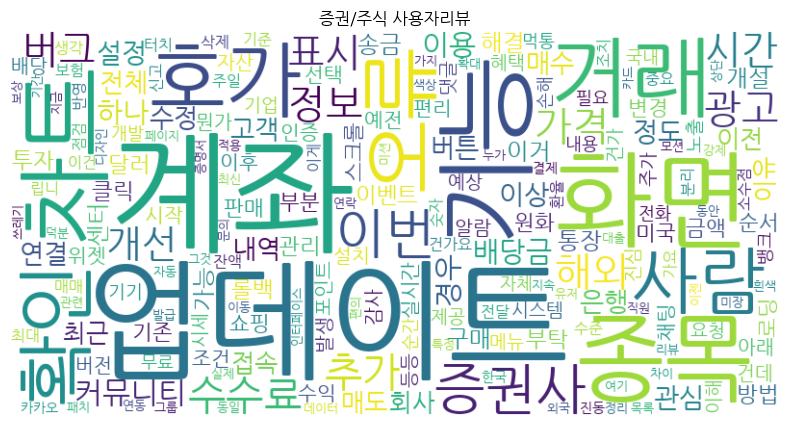

In [47]:
text_data = stock['content'].astype(str).tolist()
full_text = ' '.join(text_data)

# 불용어 세트 생성
stopwords = set(['토스','증권','주식', '사용', '불편', '짜증', '주문', '때문', '문제', '건지'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계
from collections import Counter
word_freq = Counter(filtered)

# 워드클라우드 생성
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"증권/주식 사용자리뷰")
plt.show()

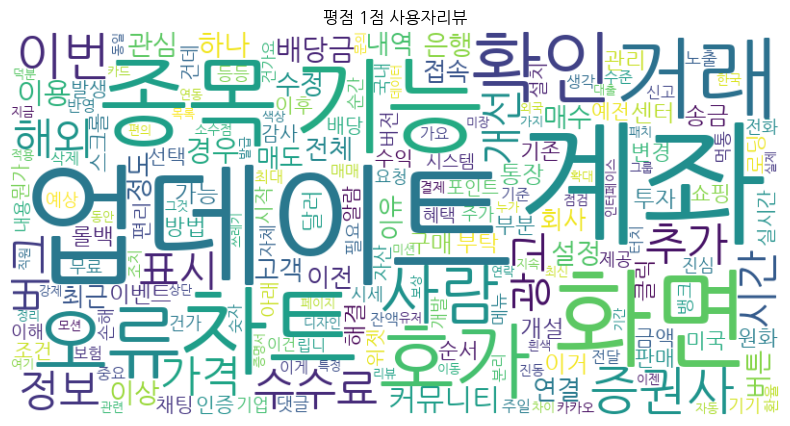

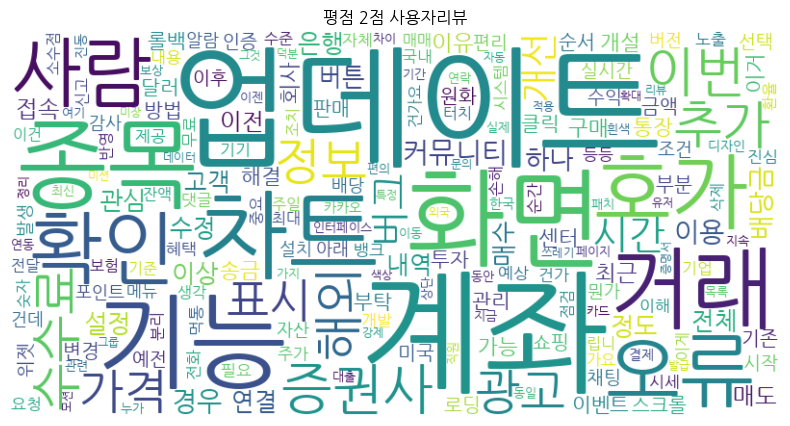

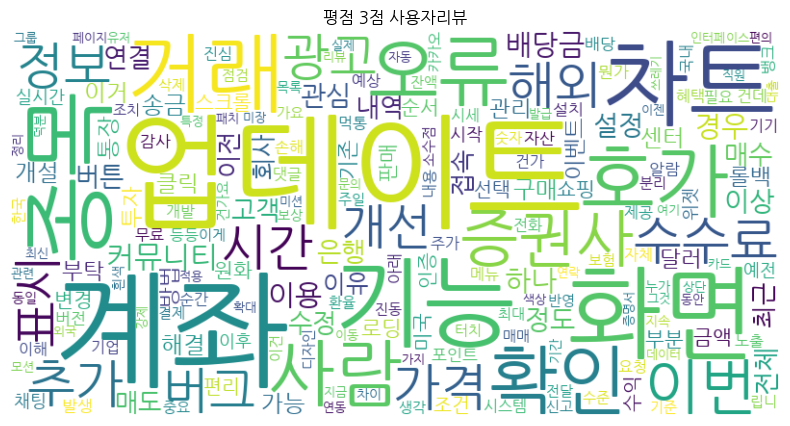

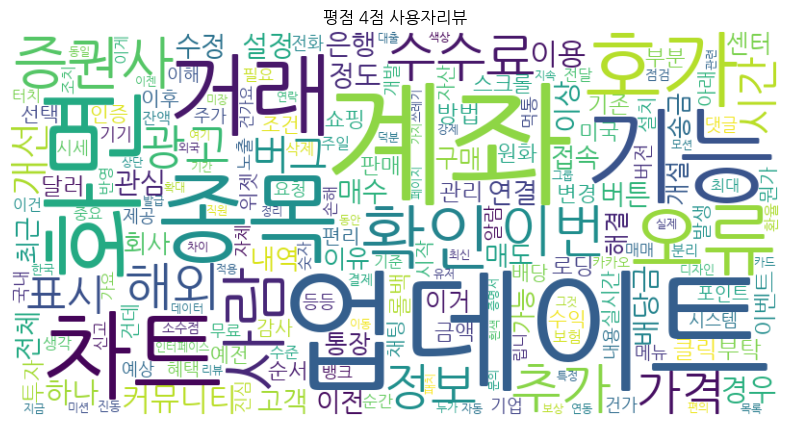

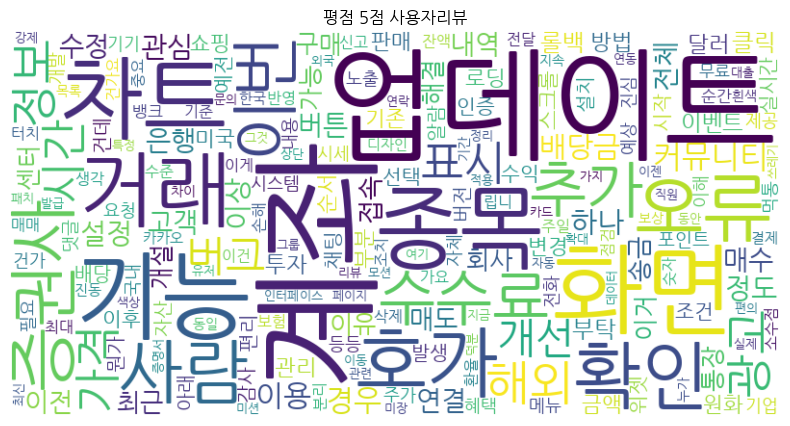

In [48]:
for i in range(1,6):
    
    text_data = stock['content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    # 불용어 세트 생성
    stopwords = set(['토스','증권','주식', '사용', '불편', '짜증', '주문', '때문', '문제', '건지'])

    # 명사 추출
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    # 빈도수 집계
    from collections import Counter
    word_freq = Counter(filtered)

    # 워드클라우드 생성
    wc = WordCloud(
            font_path='NanumGothic.ttf',
            background_color='white',
            width=800,
            height=400).generate_from_frequencies(word_freq)

    # 시각화
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"평점 {i}점 사용자리뷰")
    plt.show()

In [45]:
stock.sort_values('thumbsUpCount', ascending=False)

content  \
1331                                                                                                                                                                                                                                            너무 구림 특히 아직도 별로라 생각하는 돈보다 계좌나 사람 먼저 선택하는거 적응안되는데 이번 자주쓰는 계좌 개편은 특히 망했음 난 주식을 위한 조회용이 있고 송금을 위한 메인 계좌가 있는데 메인 계좌는 그 수많은 입출금내역이 있음에도 어떤 알고리즘인지 구석에 짱박혀있음 폰트도 구리고 색상도 배치도 내멋대로라 나이든 사람들은 사용하지도 못할듯 메인 화면 같은 중요 UI는 피쳐플래그 값 등으로 이전버전도 선택적으로 쓸 수 있도록 선택권을 좀 줘라   
1401                                                                                                                                                                                                                                                                                                                                                                                                                                     토스증권 조건주문 란 화면 들어가는 속도가 갑자기 확연하게 느려졌어요 확인 좀 부탁해요 갤노트9 안드 10버전입니다   
1172                                                                                                                                                                                                                                                                                                                    안녕하세요 토스 앱과 토스증권을 이용 중입니다 현재 토스 앱은 한 기기에서만 사용 가능하며 다른 기기에서 이용하려면 다시 인증해야 해서 불편합니다 은행 앱은 단일 기기 사용으로 유지하되 토스증권 앱을 별도로 만들어 여러 기기에서 자유롭게 이용할 수 있도록 해주실 수 있을까요 태블릿에서도 사용하고 싶어서 문의드렸습니다   
1341                                                                                                                                                                                   버그 리포트 최근에 갑자기 토스증권 시세차트 화면에서 우상단 더보기 눌러 조건주문 선택하면 그냥 빈 화면만 표시됩니다 거의 대부분 조건 주문만 사용하는데 이게 안보이니 너무 불편해서 사용을 할 수가 없네요 토스앱 내 고객센터에 버그리포트 기능이 안보여서 여기에 올려요 카카오톡 toss 는 전혀 도움이 안됩니다 토스앱 내 고객센터에서 상담원채팅 연결했더니 오늘 2025 6 10 배포가 있었다고 하여 휴대폰 리부팅 후 재시도 요청받았고 그리 하니 해결되었습니다 왜 리부팅을 해야 하는 건지는 잘 이해가 안되는데 어쨌든 해결되어서 다시 별다섯드립니다   
2665                                                                                                                                                                                                                                                                                                             50대 남성입니다 토스증권으로 주식을 많이 하고 있는데 노안이 와서 글씨가 잘 안보이네요 다른 창은 괜찮은데 호가창 차트 발견탭에서 더보기를 눌러 여러개의 주식을 볼 수 있는 화면에서 글씨가 너무 작아 보기가 힘듭니다 특히 호가창 글씨가 너무너무 작습니다 다양한 연령대를 위해 저 화면들의 글씨 크기를 더욱 키워주셨으면 좋겠습니다   
1464   2 25 주식 UI에서 홈과 관심 종목을 나눈 것도 불편한데 이번 자주 사용하는 계좌 업데이트로 완전히 사용 할 이유를 잃었음 원하는 순서와 기준에 맞춰 계좌들을 정리해뒀더니 강제로 일부 계좌만 뜨게 만들어 내 자산에 들어가는 과정을 한 번 더 거쳐야 한다는 불편함을 감수 할 이유가 전혀 없음 심지어 이전에는 잘만 계좌를 원하는 데로 순서를 정할 수 있었는데 자주 사용하는 계좌 중에서도 순서를 정할 수가 없는 게 어이가 없을 정도 편리한 UI로 이용자를 끌어 모았으면 UI가 불편해지는 순간 이용자는 떠난다는 사실을 망각한 회사 5 29 결국에는 주식 UI를 또 건드림 판매 수익을 확인하는 창에서 지맘대로 스크롤을 내리는 기능은 진짜 UX를 고려 한 흔적이 없음 이제 UI를 관리하는 직원이 더 이상 전문성이 전혀 없다고 판단해도 될듯함 홈의 광고는 창을 자꾸 멋대로 크기를 키우거나 나타나면서 UI가 움직이게 해서 거슬리게만 만들 뿐 이제 떠날 때가 됐다   
1565                                                                                                                                                                                                                                                                                                                                                                                                                                                     남이 주식으로 얼마를 벌든 그걸 내가 왜 알아야하지 토스 모든 알림 다 끄라는 도발인가   
2057                                                                                                                                                                                                                                                                                                       처음 토스증권으로 시작한 주식 잘하고있습니다 하지만 사용하는도중 조금 불편한 점이 있는데요 미국주식중 몇십원씩 하는 주식들은 0 00x달러차이도 가격 변동성이 큰데 알람을 받을때 최소단위가 0 001이라 알람을 받을때 받지못하는 경우가 있습니다 이런경우 달러가격으로도 알람을 받을수있게 해주시면 정말 토스증권을 이용하는데 도움이될것 같습니다   
2592                토스에서 미션 리워드 적립비율은 업계 최저수준

In [46]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 7 to 2967
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        323 non-null    object
 1   score          323 non-null    int64 
 2   thumbsUpCount  323 non-null    int64 
 3   appVersion     298 non-null    object
 4   at             323 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.1+ KB


In [59]:
stock[
    stock['content'].str.contains('호가')
].sort_values('thumbsUpCount', ascending=False)

content  \
2665                                                                                                                                                                                                                                                                                                             50대 남성입니다 토스증권으로 주식을 많이 하고 있는데 노안이 와서 글씨가 잘 안보이네요 다른 창은 괜찮은데 호가창 차트 발견탭에서 더보기를 눌러 여러개의 주식을 볼 수 있는 화면에서 글씨가 너무 작아 보기가 힘듭니다 특히 호가창 글씨가 너무너무 작습니다 다양한 연령대를 위해 저 화면들의 글씨 크기를 더욱 키워주셨으면 좋겠습니다   
1902                                                                                                                                                                                                                                                                                          업데이트후 토스앱 사용중에 자꾸 다운되는 이유가 뭘까요 그리고 주식 종목창에 들어가면 호가창 커뮤 종목정보등 있잖아요 근데 고정이 안되어 있고 위 아래 옆 사방으로 움직이니까 ex 호가창만 보려던 중인데 갑자기 내주식 커뮤 정보 와리가리 한다고용 너무 불편해요 혹시 제가 사용 방법을 몰라서 그러는건가요 업데이트 이전 버전으로 바꾸는게 가능하다면 방법좀 알려주세요   
456                                                                                                                                                                                                                                                                                                                               차트를 보면서 구매할수 있게 만들어 주워야줘 이건 구매창 넘기면 차트를 볼수없어요 사는과동시에 하락하면 짜증이 호가창보고 주문하려해도 현재가 표기도 안되어 있음 아직 토스는 증권하기엔 멀었네 다른증권사들 어떡해든 돈 벌게하려 애쓰던데 토스는 관심밖 정보도 느림 솔직한 후기입니다 토스에서는 돈따기힘듬   
833                                                                                                                                                                                                                                                                                                                                                                                                                                          주식초보자가 하기 아주 좋은앱 다만 중기부터는 차트설정 너무 아쉽고 호가가격도 다른 증권사보다 더 비싼가격임   
422                                                                                                                                                                                                                                                                                                                   이번패치로 토스증권 내보유주식 클릭하면 밑에 호가 내주식 커뮤니티 하단바가 밑에 있는거 매우불편합니다 그전엔 위에 있어서 편했는데 밑에 있어서 일부로 눈내려서 손가락으로 올려야하고 커뮤니티도 기존에 들어가면 손가락으로 팅기면 새글바로볼수있는데 이번패치로 팅기면 커뮤니티창이 내려가고 설정에 기존창으로 예전꺼 쓰게해주던가요   
100                                                                                                                                                                                                                                                                                                                                                 토스 증권 오류발생 기업창 처음 차트나오는 창에서 호가 종목정보등 다른 창으로 넘어가질 않음 흰색으로 깜박이다 흰색화면만 나옴 흰색화면에 뒤로가기 표시만 나옴 재설치 셋팅 초기화 해결안됨 안드로이드 웹뷰 업데이트 소용없음 태블릿에도 설치 하여 확인했으나 동일상황 발생   
517                                                                                                                                                                                                                                                                                                                                                                                               업데이트 하고 왜자꾸 렉이 잦고 호가창에서 자꾸멈추나요 괜히 업데이트해서 ui도이상해졌는데 자꾸 호가창에서 실시간호가가 바뀌지도않고 그냥 렉먹은거처럼 있네요 이러면 주식거래 어떻게합니까   
2413                                                                                                                                                                                                                                                                                                                                                                                                                                             토스 증권 왜 호가보는데 가격이 두개나 나오는거에요 너무 불편해서 쓰기 힘듭니다 정상화 좀 시켜주세요   
86                                           

In [55]:
stock.to_csv('./토스증권리뷰.csv',encoding='utf-8')

In [58]:
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 텍스트 전처리
stock["content"] = stock["content"].fillna("").astype(str)

token_re = re.compile(r"[가-힣A-Za-z0-9]{2,}")
stopwords = set("""그리고 그러나 그래서 또한 또는 그냥 이미 매우 너무 더 좀 것 거기 여기 저기 이거 그거 저거 
그런 이런 저런 하는 하는데 하는걸 하면 하면요 합니다 했습니다 했다 하니 하니까 하는지 하자 해서 해서요 해서도 
있음 있음요 있는 없고 없고요 없다 없습니다 아닌 아닌가 아닌데 아닌지 아닌듯 아닌거 같다 같은 같이 저는 저는요 제가 제가요 
너는 너희는 우리는 우리는요 여러분 당신 당신들 등이 등등 등으로 등의 정말 진짜 계속 조금 자꾸 매우 너무 아주 제발 좀만 좀더 더더욱 
또 또다시 다시 또또 다시한번 이번 이번에 다음 다음에 그다음 그 전에 이후 이후에 전 후 앞 뒤 위 아래 많이 너무나 거의 약간 대충 
싶다 싶어요 싶습니다 바랍니다 바람 바래요 바랍니다요 토스 증권 주식 토스증권 은행""".split())

def tok(s: str):
    toks = token_re.findall(str(s).lower())
    return [t for t in toks if t not in stopwords and len(t) >= 2]

# 벡터화
vectorizer = CountVectorizer(tokenizer=tok, ngram_range=(1,2), min_df=3, max_df=0.4)
X = vectorizer.fit_transform(stock["content"].tolist())
vocab = vectorizer.get_feature_names_out()

# LDA 모델 학습
lda = LatentDirichletAllocation(
    n_components=6,
    learning_method="batch",
    random_state=42,
    max_iter=30
)
W = lda.fit_transform(X)
H = lda.components_

# 토픽별 상위 단어 추출
def topic_top_terms(k, topn=10):
    ids = H[k].argsort()[::-1][:topn]
    return [vocab[i] for i in ids]

topic_summaries = []
for k in range(6):
    topic_summaries.append({
        "topic_id": k,
        "top_terms": topic_top_terms(k, 10)
    })

topic_summaries

/home/ceun2/miniforge3/envs/fintech/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[{'topic_id': 0,
  'top_terms': ['다른',
   '이벤트',
   '모든',
   '계좌',
   '경우가',
   '이제',
   '제대로',
   '누르면',
   '호가창',
   '없음']},
 {'topic_id': 1,
  'top_terms': ['업데이트',
   '렉이',
   '커뮤니티',
   '불편합니다',
   '이렇게',
   '들어가면',
   '현재',
   '언제',
   '사람',
   '없는']},
 {'topic_id': 2,
  'top_terms': ['계좌',
   '다른',
   '주식을',
   '기능',
   '좋겠습니다',
   '추가',
   '앱이',
   '해주세요',
   '메인',
   '업데이트를']},
 {'topic_id': 3,
  'top_terms': ['갑자기',
   '하고',
   '해외주식',
   '배당금',
   '아예',
   '미국주식',
   '주식거래',
   '확인',
   '안되네요',
   '근데']},
 {'topic_id': 4,
  'top_terms': ['안되고',
   'ui',
   '다른',
   '쓰고',
   '화면',
   '주식이',
   '광고가',
   '업데이트하고',
   '점점',
   '최근']},
 {'topic_id': 5,
  'top_terms': ['자주',
   '차트',
   '다른',
   '쓰는',
   '무슨',
   '호가창',
   '기능이',
   '같아요',
   '계좌',
   '버그가']}]